<a href="https://colab.research.google.com/github/iPranjalSinha/Machine-Learning-Python-Notebooks-/blob/main/1_3_Regression_Polynomial_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Part 1: Data preprocessing**

## 1.1. Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## 1.2. Importing the dataset

In [ ]:
dataset = pd.read_csv("Position_Salaries.csv")

## 1.3. Exploring the dataset

In [ ]:
print(dataset.head())

            Position  Level  Salary
0   Business Analyst      1   45000
1  Junior Consultant      2   50000
2  Senior Consultant      3   60000
3            Manager      4   80000
4    Country Manager      5  110000


In [ ]:
print(dataset.shape)

(10, 3)


In [ ]:
print(dataset.columns)

Index(['Position', 'Level', 'Salary'], dtype='object')


## 1.4. Identifying independent variables and dependent variables

In [ ]:
# Independent variable
X = dataset.iloc[:, 1:-1].values

# Dependent variable
y = dataset.iloc[:, -1].values

## 1.5. Handling missing data

### 1.5.1. Checking if there is any missing data

In [ ]:
print(dataset.isnull().values.any())

False


### 1.5.2. Handling missing data

In [ ]:
# from sklearn.impute import SimpleImputer
# imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
# imputer.fit(X[:, 1:3])
# X[:, 1:3] = imputer.transform(X[:, 1:3])

## 1.6. Encoding categorical data

In [ ]:
# # Encoding the independent variable
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import OneHotEncoder
# ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
# X = np.array(ct.fit_transform(X))

In [ ]:
# # Encoding the dependent variable
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# y = le.fit_transform(y)

## 1.7. Splitting the dataset into a training set and test set

In [ ]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

## 1.8. Feature scaling

In [ ]:
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train[:, 3:] = sc.fit_transform(X_train[:, 3:])
# X_test = sc.transform(X_test)

# **Part 2: Creating a model**

## 2.1. Training the *Simple Linear Regression* model on the whole dataset

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## 2.2. Traininng the *Polynomial Regression* model on the whole dataset

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## 2.2. Predicting a new result with *Simple Linear Regression*

In [ ]:
lin_reg.predict([[6.5]])

array([330378.78787879])

## 2.3. Predicting a new result with *Polynomial Regression*

In [ ]:
lin_reg_2.predict(poly_reg.fit_transform([[6.5]]))

array([158862.45265155])

# **Part 3: Visualizing the results**

## 3.1. Visualizing the *Simple Linear Regression* results

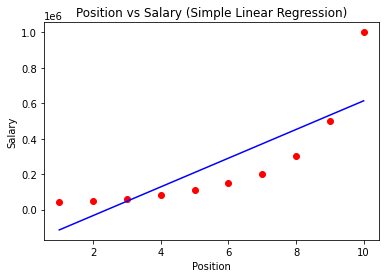

In [ ]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg.predict(X), color = 'blue')
plt.title('Position vs Salary (Simple Linear Regression)')
plt.xlabel('Position')
plt.ylabel('Salary')
plt.show()

## 3.2. Visualizing the *Polynomial Regression* results

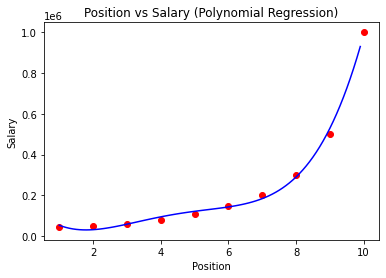

In [ ]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color = 'blue')
plt.title('Position vs Salary (Polynomial Regression)')
plt.xlabel('Position')
plt.ylabel('Salary')
plt.show()